In [1]:
%matplotlib inline
import numpy as np;
import matplotlib as mpl
import  PIL
from PIL import Image
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
from __future__ import print_function
from scipy.stats import multivariate_normal, norm
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from moviepy.editor import ImageSequenceClip



## Cmean Klasterizacija , Linearno separabilne klase


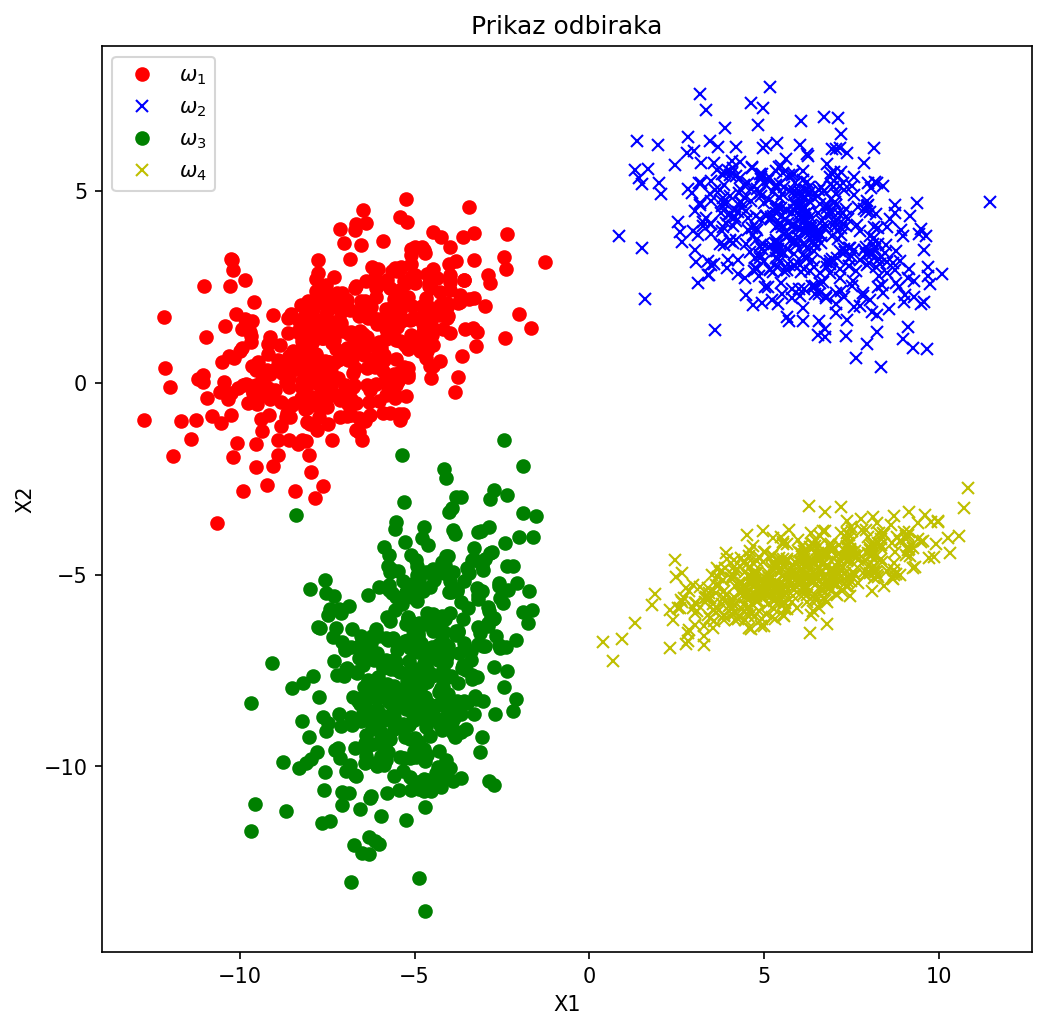

In [2]:
N = 500

M1 = np.array([-7,1]).T 
M2 = np.array([6,4]).T 
M3 = np.array([-5 ,-7.5]).T 
M4 = np.array([6, -5]).T

cov1 = np.array([[4, 1.1], [1.1, 2]])
cov2 = np.array([[3, -0.8], [-0.8, 1.5]])
cov3 = np.array([[2, 1.1], [1.1, 4]])
cov4 = np.array([[3, 0.8], [0.8, 0.5]])


#
K1 = np.random.multivariate_normal(M1,cov1,N).T
K2 = np.random.multivariate_normal(M2,cov2,N).T
K3 = np.random.multivariate_normal(M3,cov3,N).T
K4 = np.random.multivariate_normal(M4,cov4,N).T



fig, ax = plt.subplots(figsize = (8,8))
ax.set(xlabel = 'X1',ylabel = 'X2')
ax.plot(K1[0,:],K1[1,:],'ro',label = '$\omega_{1}$')
ax.plot(K2[0,:],K2[1,:],'bx',label = '$\omega_{2}$')
ax.plot(K3[0,:],K3[1,:],'go',label = '$\omega_{3}$')
ax.plot(K4[0,:],K4[1,:],'yx',label = '$\omega_{4}$')
ax.set(title = 'Prikaz odbiraka')
ax.legend(loc = 'upper left')
plt.show()



In [3]:
def jednaki_odbirci(K,Ktemp):
    return np.array_equiv(np.sort(K,axis=0), np.sort(Ktemp,axis=0))

def Klasterizuj(K,M1,M2,M3,M4):
    
    d1 = np.reshape(np.sum(np.square(K - M1),axis = 0),(1,-1))
    d2 = np.reshape(np.sum(np.square(K - M2),axis = 0),(1,-1))
    d3 = np.reshape(np.sum(np.square(K - M3),axis = 0),(1,-1))
    d4 = np.reshape(np.sum(np.square(K - M4),axis = 0),(1,-1))

    ds = np.concatenate((d1,d2,d3,d4),axis = 0)
    dodaj1 = np.where(np.equal(np.min(ds,axis = 0) ,d1))[1]
    dodaj2 = np.where(np.equal(np.min(ds,axis = 0) ,d2))[1]
    dodaj3 = np.where(np.equal(np.min(ds,axis = 0) ,d3))[1]
    dodaj4 = np.where(np.equal(np.min(ds,axis = 0) ,d4))[1]
    
    return dodaj1,dodaj2,dodaj3,dodaj4
    
def Provera(Koriginal,K1,K2,K3,K4):
    ## mi ne znamo tacno da li klase K1-4 odgovaraju originalno definisanim klasama
    Pr1 = np.array([np.sum(np.isin(Koriginal,K1).flatten())])/2
    Pr2 = np.array([np.sum(np.isin(Koriginal,K2).flatten())])/2
    Pr3 = np.array([np.sum(np.isin(Koriginal,K3).flatten())])/2
    Pr4 = np.array([np.sum(np.isin(Koriginal,K4).flatten())])/2
    return np.shape(Koriginal)[1] - np.max(np.concatenate((Pr1,Pr2,Pr3,Pr4)))



## Cmean

In [4]:
greskaKlasterizacije = np.array([])
brojRazvrstavanja  = 1
IterSr = 0
fig = Figure(figsize = (4,4))
canvas = FigureCanvas(fig)
ax = fig.add_subplot()
#ax.set(xlabel = 'X1',ylabel = 'X2')
ims = []

while(brojRazvrstavanja <= 50):
    ind = np.random.rand(N,1)


## Slucajno svrstavanje



    
    indeks1 = np.argwhere(ind < 0.25)[:,0]
    indeks2 = np.argwhere(np.logical_and(ind > 0.25,ind < 0.5))[:,0]
    indeks3 = np.argwhere(np.logical_and(ind > 0.5,ind < 0.75))[:,0]
    indeks4 = np.argwhere(ind > 0.75)[:,0]

        
    
    K10 = np.hstack((K1[:,indeks1],K2[:,indeks1],K3[:,indeks1],K4[:,indeks1]))
    K20 = np.hstack((K1[:,indeks2],K2[:,indeks2],K3[:,indeks2],K4[:,indeks2]))
    K30 = np.hstack((K1[:,indeks3],K2[:,indeks3],K3[:,indeks3],K4[:,indeks3]))
    K40 = np.hstack((K1[:,indeks4],K2[:,indeks4],K3[:,indeks4],K4[:,indeks4]))


    
    if (brojRazvrstavanja == 50):
         
            
            ax.plot(K10[0,:],K10[1,:],'ro',label = '$\omega_{1}$')
            ax.plot(K20[0,:],K20[1,:],'bx',label = '$\omega_{2}$')
            ax.plot(K30[0,:],K30[1,:],'go',label = '$\omega_{3}$')
            ax.plot(K40[0,:],K40[1,:],'yx',label = '$\omega_{4}$')

            canvas.draw()
            image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
            image_from_plot = image_from_plot.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            ims.append(image_from_plot)
            ax.clear()
    

    M10 = np.reshape(np.mean(K10,axis = 1),(2,1))
    M20 = np.reshape(np.mean(K20,axis = 1),(2,1))
    M30 = np.reshape(np.mean(K30,axis = 1),(2,1))
    M40 = np.reshape(np.mean(K40,axis = 1),(2,1))


    maxIter = 200
    Nbiter = 1



    while(Nbiter < maxIter):

        K1temp = np.array([[],[]])
        K2temp = np.array([[],[]])
        K3temp = np.array([[],[]])
        K4temp = np.array([[],[]])



        # K1
        dodaj1,dodaj2,dodaj3,dodaj4= Klasterizuj(K10,M10,M20,M30,M40)
        K1temp = np.concatenate((K1temp,K10[:,dodaj1]),axis = 1)
        K2temp = np.concatenate((K2temp,K10[:,dodaj2]),axis = 1)
        K3temp = np.concatenate((K3temp,K10[:,dodaj3]),axis = 1)
        K4temp = np.concatenate((K4temp,K10[:,dodaj4]),axis = 1)

        



        #K2

        dodaj1,dodaj2,dodaj3,dodaj4 = Klasterizuj(K20,M10,M20,M30,M40)
        K1temp = np.concatenate((K1temp,K20[:,dodaj1]),axis = 1)
        K2temp = np.concatenate((K2temp,K20[:,dodaj2]),axis = 1)
        K3temp = np.concatenate((K3temp,K20[:,dodaj3]),axis = 1)
        K4temp = np.concatenate((K4temp,K20[:,dodaj4]),axis = 1)


        #K3

        dodaj1,dodaj2,dodaj3,dodaj4 = Klasterizuj(K30,M10,M20,M30,M40)
        K1temp = np.concatenate((K1temp,K30[:,dodaj1]),axis = 1)
        K2temp = np.concatenate((K2temp,K30[:,dodaj2]),axis = 1)
        K3temp = np.concatenate((K3temp,K30[:,dodaj3]),axis = 1)
        K4temp = np.concatenate((K4temp,K30[:,dodaj4]),axis = 1)


        #K4
        
        dodaj1,dodaj2,dodaj3,dodaj4 = Klasterizuj(K40,M10,M20,M30,M40)
        K1temp = np.concatenate((K1temp,K40[:,dodaj1]),axis = 1)
        K2temp = np.concatenate((K2temp,K40[:,dodaj2]),axis = 1)
        K3temp = np.concatenate((K3temp,K40[:,dodaj3]),axis = 1)
        K4temp = np.concatenate((K4temp,K40[:,dodaj4]),axis = 1)

        
         #K5

        
        uslov = jednaki_odbirci(K10,K1temp) and jednaki_odbirci(K20,K2temp) and jednaki_odbirci(K30,K3temp) and jednaki_odbirci(K40,K4temp)# and jednaki_odbirci(K50,K5temp)
        if uslov:
            #print(uslov)
            #izracunavanje greske klasterizacije
            ukupnaGreska = Provera(K1,K10,K20,K30,K40) + Provera(K2,K10,K20,K30,K40) + Provera(K3,K10,K20,K30,K40) + Provera(K4,K10,K20,K30,K40)
            
            greskaKlasterizacije = np.append(greskaKlasterizacije,ukupnaGreska)
            
                
            
            break
        K10 = K1temp
        K20 = K2temp
        K30 = K3temp
        K40 = K4temp


        

        M10 = np.reshape(np.mean(K10,axis = 1),(2,1)) if  K10.size else M10  #Ukoliko se desi da neka klasa prilikom reklasifikacije ostane prazna, zadrzavam prethodnu srednju vrednost
        M20 = np.reshape(np.mean(K20,axis = 1),(2,1)) if  K20.size else M20
        M30 = np.reshape(np.mean(K30,axis = 1),(2,1)) if  K30.size else M30
        M40 = np.reshape(np.mean(K40,axis = 1),(2,1)) if  K40.size else M40



        if (brojRazvrstavanja == 50):
         
            
            ax.plot(K10[0,:],K10[1,:],'ro',label = '$\omega_{1}$')
            ax.plot(K20[0,:],K20[1,:],'bx',label = '$\omega_{2}$')
            ax.plot(K30[0,:],K30[1,:],'go',label = '$\omega_{3}$')
            ax.plot(K40[0,:],K40[1,:],'yx',label = '$\omega_{4}$')

            canvas.draw()
            image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
            image_from_plot = image_from_plot.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            ims.append(image_from_plot)
            ax.clear()
         






        Nbiter = Nbiter + 1
    

    brojRazvrstavanja = brojRazvrstavanja + 1
    IterSr = IterSr + Nbiter/50
    
plt.show()    
    
    





In [5]:
ims = np.array(ims)
clip = ImageSequenceClip(list(ims), fps=1)
clip.write_gif('cmean_novo.gif', fps=1)

t:  43%|██████████████████████████████▍                                        | 3/7 [00:00<00:00, 23.15it/s, now=None]

MoviePy - Building file cmean_novo.gif with imageio.


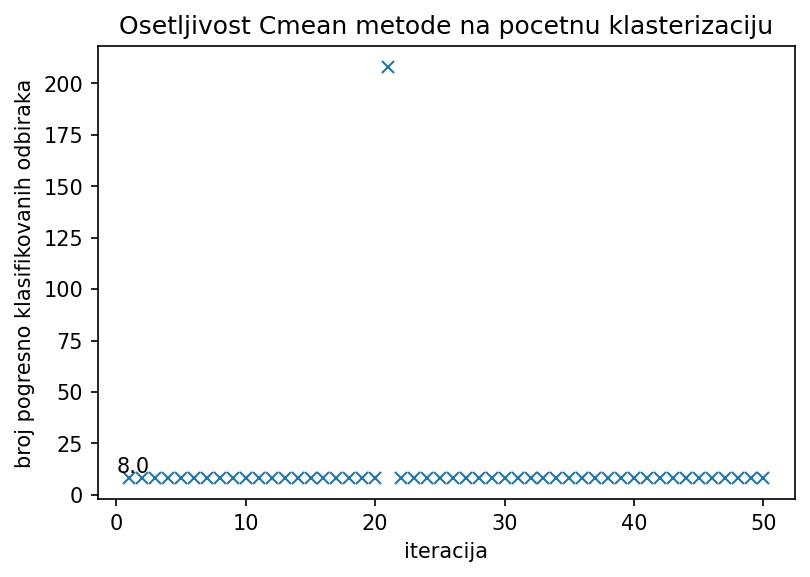

In [82]:
fig,ax = plt.subplots()
#plt.yscale('log')
ax.plot(np.arange(1,51),greskaKlasterizacije,'x')
ax.set(xlabel = 'iteracija',ylabel = 'broj pogresno klasifikovanih odbiraka',title = 'Osetljivost Cmean metode na pocetnu klasterizaciju')
ax.annotate(greskaKlasterizacije[0],(0,greskaKlasterizacije[0]+3))
plt.show()

In [77]:
IterSr

6.459999999999999

## Metod kvadratne dekompozicije nelinearno separabilne klase

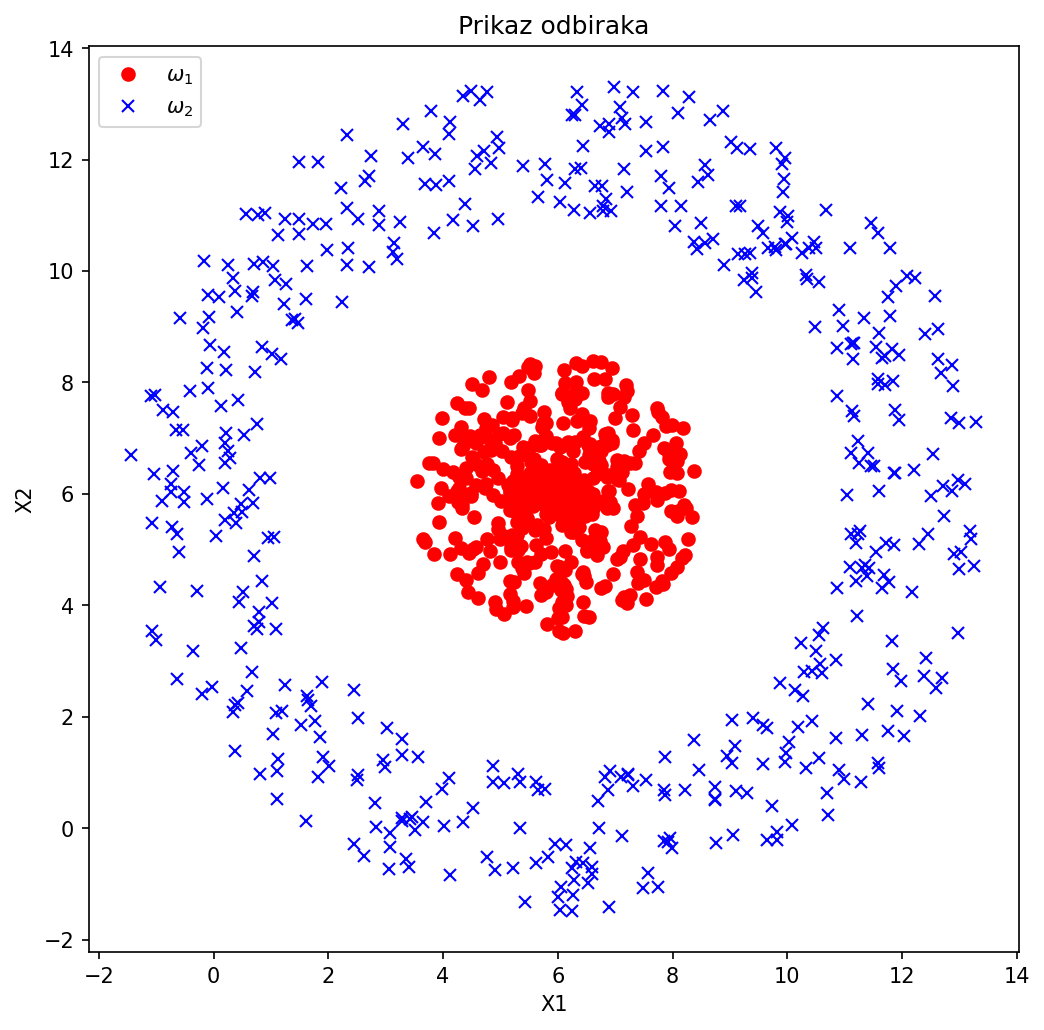

In [17]:
#Definisanje klasa
N = 500
C = np.array([[6],[6]])
R = 2.5 * np.random.rand(1,N)
Theta = 2 * np.pi * np.random.rand(1,N)
K1 = C + np.vstack((R*np.cos(Theta),R*np.sin(Theta)))

K2 = C + np.vstack(((R+5)*np.cos(Theta),(R+5)*np.sin(Theta)))

fig, ax = plt.subplots(figsize = (8,8))
ax.set(xlabel = 'X1',ylabel = 'X2')
ax.plot(K1[0,:],K1[1,:],'ro',label = '$\omega_{1}$')
ax.plot(K2[0,:],K2[1,:],'bx',label = '$\omega_{2}$')

ax.set(title = 'Prikaz odbiraka')
ax.legend(loc = 'upper left')
plt.show()


In [35]:
def KlasterizujND(K,M1,M2,Cov1,Cov2):
    d1 = np.reshape(-np.log(multivariate_normal.pdf(K.T,M1,Cov1)),(1,-1))
    d2 = np.reshape(-np.log(multivariate_normal.pdf(K.T,M1,Cov2)),(1,-1))
    

    ds = np.concatenate((d1,d2),axis = 0)
    dodaj1 = np.where(np.equal(np.min(ds,axis = 0) ,d1))[1]
    dodaj2 = np.where(np.equal(np.min(ds,axis = 0) ,d2))[1]
  
    
    return dodaj1,dodaj2
    
def ProveraND(Koriginal,K1,K2):
    ## mi ne znamo tacno da li klase K1-2 nakon klasterizacije odgovaraju originalno definisanim klasama
    Pr1 = np.array([np.sum(np.isin(Koriginal,K1).flatten())])/2
    Pr2 = np.array([np.sum(np.isin(Koriginal,K2).flatten())])/2
    return np.shape(Koriginal)[1] - np.max(np.concatenate((Pr1,Pr2)))

def jednaki_odbirci(K,Ktemp):
    return np.array_equiv(np.sort(K,axis=0), np.sort(Ktemp,axis=0))

## Prikazivanje iteracija

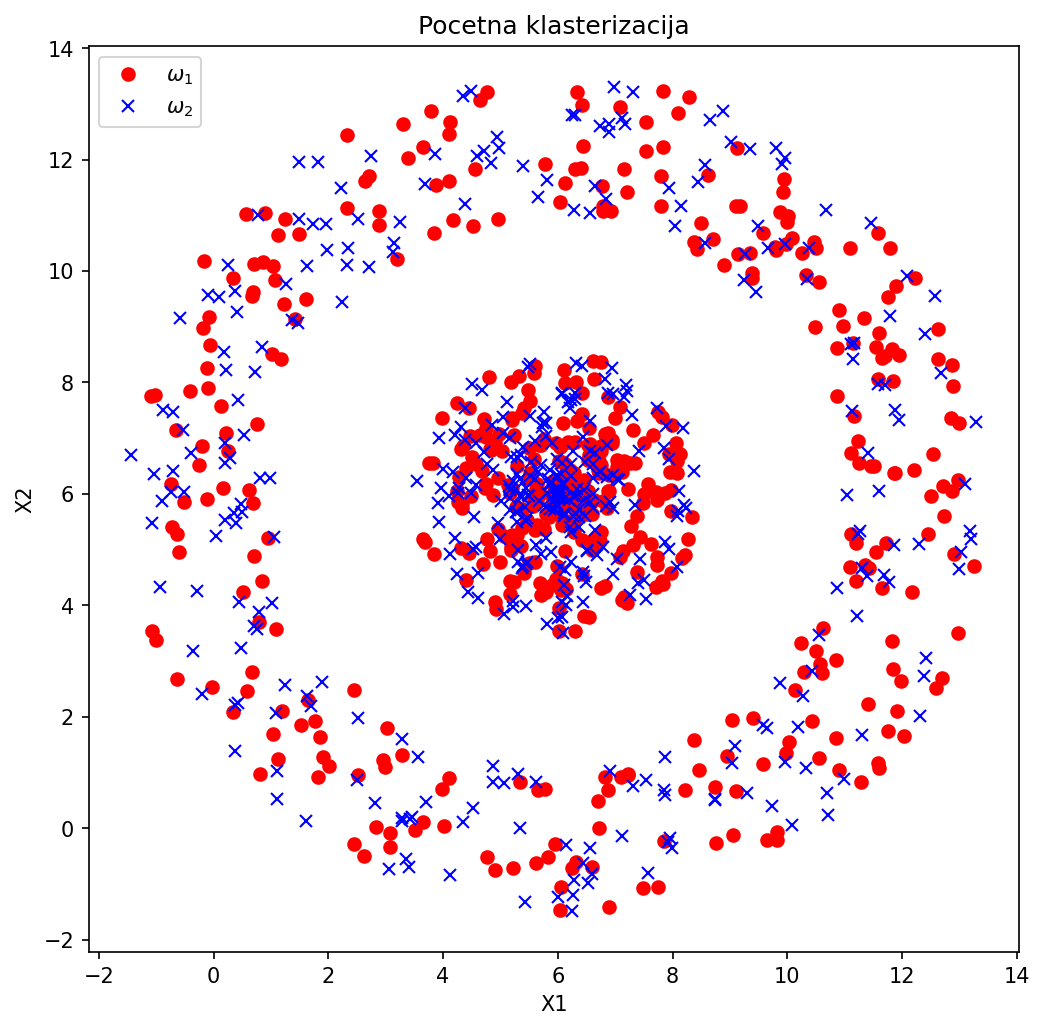

In [36]:
ind = np.random.rand(N,1)



## Slucajno svrstavanje


indeks1 = np.argwhere(ind < 0.5)[:,0] #3 klase pretpostavljene
indeks2 = np.argwhere(ind > 0.5)[:,0]

K10 = np.hstack((K1[:,indeks1],K2[:,indeks1]))
K20 = np.hstack((K1[:,indeks2],K2[:,indeks2]))



fig, ax = plt.subplots(figsize = (8,8))
ax.set(xlabel = 'X1',ylabel = 'X2')
ax.plot(K10[0,:],K10[1,:],'ro',label = '$\omega_{1}$')
ax.plot(K20[0,:],K20[1,:],'bx',label = '$\omega_{2}$')
ax.set(title = 'Pocetna klasterizacija')
ax.legend(loc = 'upper left')
plt.show()


In [37]:
M10 = np.mean(K10,axis = 1)
M20 = np.mean(K20,axis = 1)

Cov10 = np.cov(K10)
Cov20 = np.cov(K20)
maxIter = 200
Nbiter = 1

fig = Figure(figsize = (4,4))
canvas = FigureCanvas(fig)
ax = fig.add_subplot()
ims = []
ax.plot(K10[0,:],K10[1,:],'ro',label = '$\omega_{1}$')
ax.plot(K20[0,:],K20[1,:],'bx',label = '$\omega_{2}$')
canvas.draw()
image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image_from_plot = image_from_plot.reshape(fig.canvas.get_width_height()[::-1] + (3,))
ims.append(image_from_plot)
ax.clear()

while(Nbiter < maxIter):

    K1temp = np.array([[],[]])
    K2temp = np.array([[],[]])
    K3temp = np.array([[],[]])
    K4temp = np.array([[],[]])
    
    # K1
    dodaj1,dodaj2 = KlasterizujND(K10,M10,M20,Cov10,Cov20)
    K1temp = np.concatenate((K1temp,K10[:,dodaj1]),axis = 1)
    K2temp = np.concatenate((K2temp,K10[:,dodaj2]),axis = 1)

    #K2
    dodaj1,dodaj2 = KlasterizujND(K20,M10,M20,Cov10,Cov20)
    K1temp = np.concatenate((K1temp,K20[:,dodaj1]),axis = 1)
    K2temp = np.concatenate((K2temp,K20[:,dodaj2]),axis = 1)

    
    uslov = jednaki_odbirci(K10,K1temp) and jednaki_odbirci(K20,K2temp)#and jednaki_odbirci(K30,K3temp) and jednaki_odbirci(K40,K4temp)
    if (uslov):
        break
    K10 = K1temp
    K20 = K2temp

    
    Cov10 = np.cov(K10) if K10.size else Cov10
    Cov20 = np.cov(K20) if K20.size else Cov20

    M10 = np.mean(K10,axis = 1) if  K10.size else M10  #Ukoliko se desi da neka klasa prilikom reklasifikacije ostane prazna, zadrzavam prethodnu srednju vrednost
    M20 = np.mean(K20,axis = 1) if  K20.size else M20

    
    ax.plot(K10[0,:],K10[1,:],'ro',label = '$\omega_{1}$')
    ax.plot(K20[0,:],K20[1,:],'bx',label = '$\omega_{2}$')

    
    canvas.draw()
    image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    image_from_plot = image_from_plot.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    ims.append(image_from_plot)
    ax.clear()
    
    Nbiter = Nbiter + 1

plt.show()

In [27]:
ims = np.array(ims)
clip = ImageSequenceClip(list(ims), fps=3)
# clip.write_gif('kvadratdekomp.gif', fps=3)

t:  17%|███████████▋                                                          | 3/18 [00:00<00:00, 23.08it/s, now=None]

MoviePy - Building file kvadratdekomp4.gif with imageio.


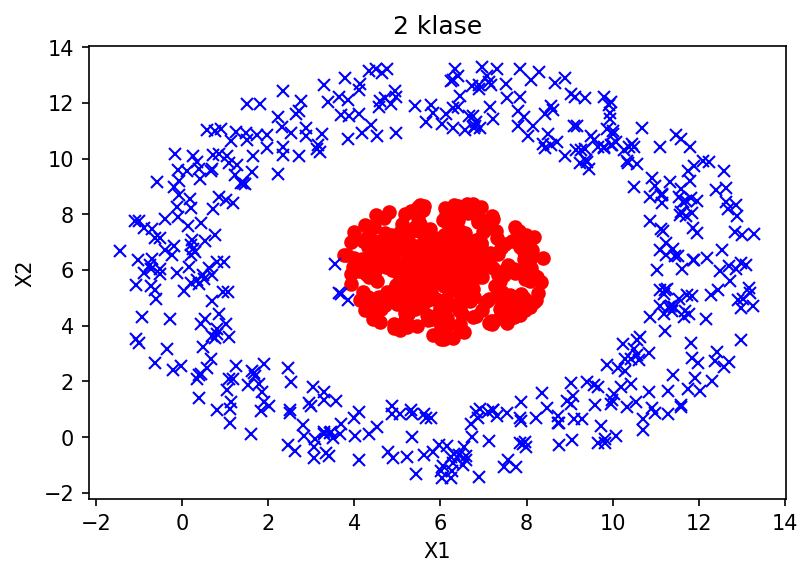

In [38]:
fig,ax = plt.subplots()
ax.plot(K10[0,:],K10[1,:],'ro',label = '$\omega_{1}$')
ax.plot(K20[0,:],K20[1,:],'bx',label = '$\omega_{2}$')
ax.set(xlabel = 'X1',ylabel = 'X2',title = '2 klase')
plt.show()


## Racunanje osetljivosti

In [117]:
BrojRazvrstavanja = 1
greskaKlasterizacije = np.array([])
IterSr = 0
while(BrojRazvrstavanja <= 50):
    ind = np.repeat(np.random.rand(1,N), 2 ,axis = 0)


    ## Slucajno svrstavanje

    K10 =np.hstack((np.reshape(K1[ind < 0.5],(2,-1)),np.reshape(K2[ind < 0.5],(2,-1))))
    K20 =np.hstack((np.reshape(K1[ind >= 0.5],(2,-1)),np.reshape(K2[ind >= 0.5],(2,-1))))
    N10 = np.shape(K10)[1]
    N20 = np.shape(K20)[1]


    M10 = np.mean(K10,axis = 1)
    M20 = np.mean(K20,axis = 1)

    Cov10 = np.cov(K10)
    Cov20 = np.cov(K20)

    maxIter = 200
    Nbiter = 1

    #fig, ax = plt.subplots(figsize = (8,8))


    while(Nbiter < maxIter):

        K1temp = np.array([[],[]])
        K2temp = np.array([[],[]])

        # K1
        dodaj1,dodaj2 = KlasterizujND(K10,M10,M20,Cov10,Cov20)
        K1temp = np.concatenate((K1temp,K10[:,dodaj1]),axis = 1)
        K2temp = np.concatenate((K2temp,K10[:,dodaj2]),axis = 1)
        #K2

        dodaj1,dodaj2 = KlasterizujND(K20,M10,M20,Cov10,Cov20)
        K1temp = np.concatenate((K1temp,K20[:,dodaj1]),axis = 1)
        K2temp = np.concatenate((K2temp,K20[:,dodaj2]),axis = 1)



        uslov = np.array_equiv(np.sort(K10,axis=0), np.sort(K1temp,axis=0)) and np.array_equiv(np.sort(K20,axis=0), np.sort(K2temp,axis=0)) 
        if (uslov):
            #print(uslov)
                ## izracunavanje greske klasterizacije
            ukupnaGreska = ProveraND(K1,K10,K20) + ProveraND(K2,K10,K20)

            greskaKlasterizacije = np.append(greskaKlasterizacije,ukupnaGreska)



            break
        K10 = K1temp
        K20 = K2temp


        N10 = np.shape(K10)[1]
        N20 = np.shape(K20)[1]

        Cov10 = np.cov(K10) if K10.size else Cov10
        Cov20 = np.cov(K20) if K20.size else Cov20

        M10 = np.mean(K10,axis = 1) if  K10.size else M10  #Ukoliko se desi da neka klasa prilikom reklasifikacije ostane prazna, zadrzavam prethodnu srednju vrednost
        M20 = np.mean(K20,axis = 1) if  K20.size else M20


        Nbiter = Nbiter + 1
    BrojRazvrstavanja = BrojRazvrstavanja + 1
    IterSr = IterSr + Nbiter/50



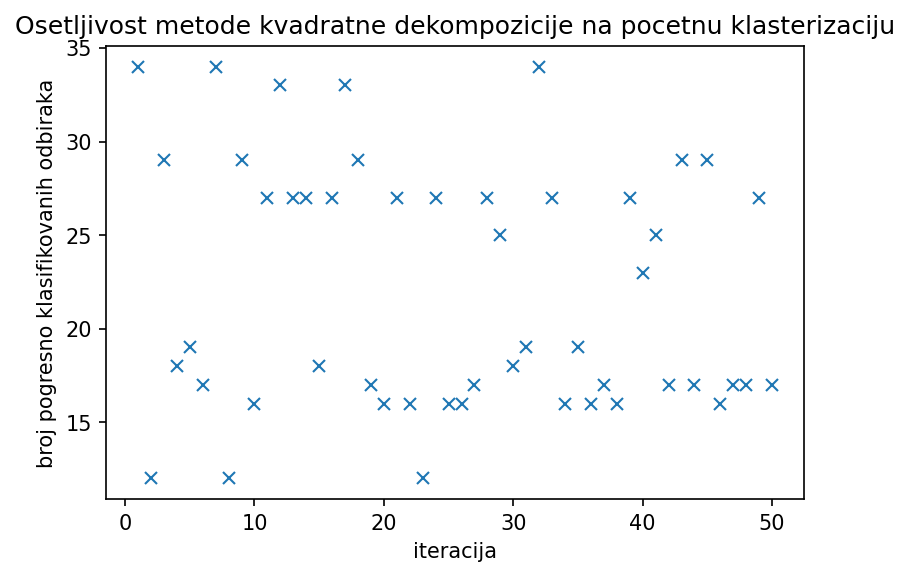

In [118]:
fig,ax = plt.subplots()

ax.plot(np.arange(1,51),greskaKlasterizacije,'x')
ax.set(xlabel = 'iteracija',ylabel = 'broj pogresno klasifikovanih odbiraka',title = 'Osetljivost metode kvadratne dekompozicije na pocetnu klasterizaciju')
plt.show()

In [119]:
IterSr

11.78